0 169 202


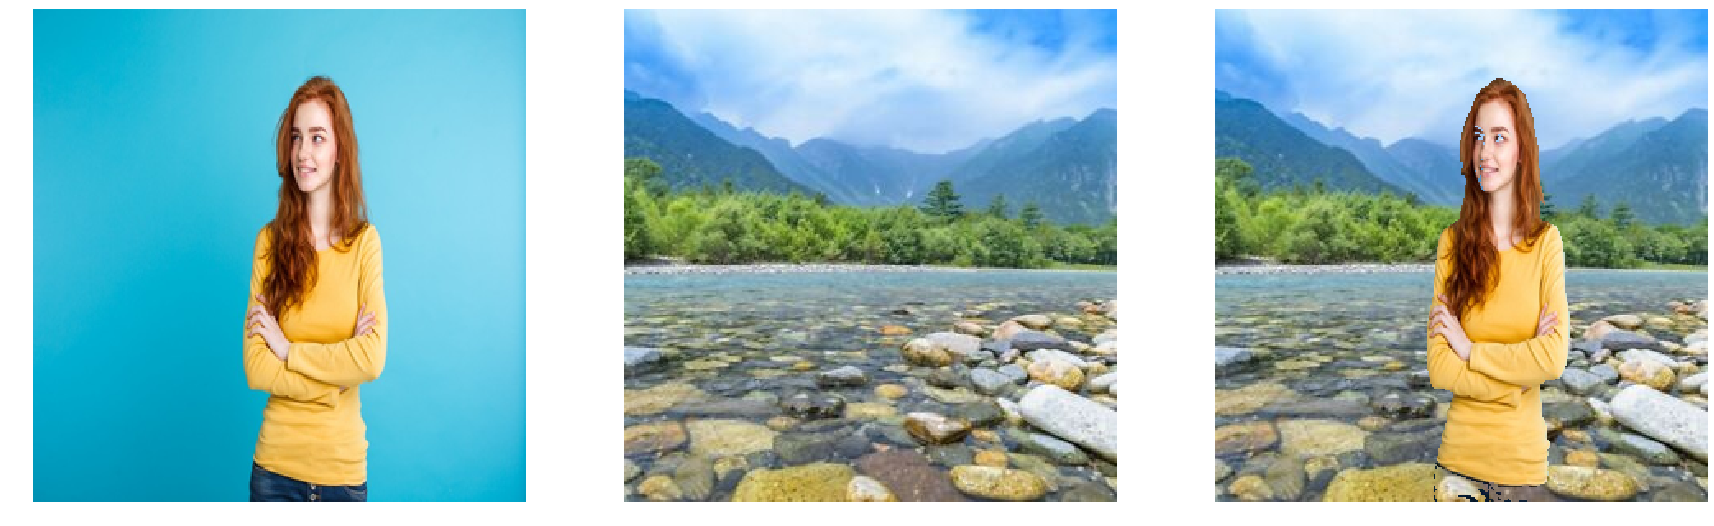

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2
def dominantColor(img):
    img = np.array(img)
    cnt = np.zeros((256, 256, 256))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            cnt[img[i][j][0]][img[i][j][1]][img[i][j][2]]+=1
    # print(cnt.shape)
    maxi = -1
    for i in range(256):
        for j in range(256):
            for k in range(256):
                if cnt[i][j][k] > maxi:
                    max_r = i
                    max_g = j
                    max_b = k
                    maxi = cnt[i][j][k]
    print(max_r, max_g, max_b)
    # h ,w = img.shape()
    h = img.shape[0]
    w = img.shape[1]
    color = [max_r, max_g, max_b]
    new_img = np.empty((h,w,3))
    new_img[0:h, 0:w, :] = color[:]
    # new_img[h:h+3, 0:w, :] = color[:]
    new_img = new_img.astype('uint8')
    return color

def mergeImage(fg, bg):
    w, h = bg.size
    fg = fg.resize((w, h), Image.ANTIALIAS)
    bg = np.array(bg)
#     fg = np.array(fg)
    fg_new = np.array(fg)
#     print(fg.shape)
    fg1 = dominantColor(fg_new)
    
    for i in range(fg_new.shape[0]):
        for j in range(fg_new.shape[1]):
            c = abs((fg_new[i][j][0]-fg1[0]))**2+abs((fg_new[i][j][1]-fg1[1]))**2+abs(fg_new[i][j][2]-fg1[2])**2
            if c < 40000:
                fg_new[i][j] = bg[i][j]

    fig = plt.figure(figsize=[30,30])
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(fg);ax1.axis('off')
    
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(bg);ax2.axis('off')
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(fg_new);ax3.axis('off')

#     plt.imshow(fg);plt.axis('off')
    plt.show()
if __name__ == '__main__':
#     fg = Image.open('../input/fg.jpg')
#     bg = Image.open('../input/bg.jpg')
    fg = Image.open('../input/blue_background.jpg')
    bg = Image.open('../input/river_back.jpg')
#     color = [0, 255, 0]
    mergeImage(fg, bg)